<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Как обычно, для начала импортируем необходимые библиотеки, прочитаем таблицу и выведем на экран несколько строк вместе с общей информацией.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' , decimal=',')
display(df.head())
df.info()



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Таблица большая, да и пропусков хватает. Займемся ими на этапе предобработки.

Согласно легенде исследования, колонки несут в себе следующую информацию: 

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Часть из них для нас абсолютно бесполезна (например, количество фотографий, водоемов), но удалять не будем, это сделать недолго, а кому-то может пригодиться.

Сразу можно заметить, что некоторые колонки названы не совсем корректно. Большой беды в этом нет, но чтобы не путаться потом самому, лучше сразу переименовать, благо их не так много.

In [2]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                        'parks_around3000':'parks_around_3000', 
                        'ponds_around3000':'ponds_around_3000' })
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Так лучше.

### Вывод

Таблица приведена в пригодный для предобработки вид. Есть большое количество пропусков, которые мы постараемся заполнить. В некоторых столбцах также понадобится сменить тип данных.

## Предобработка данных

Посмотрим, сколько пропусков и где у нас есть.

In [3]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Большое количество пропусков имеется в столбцах, которые нам понадобятся для анализа. Чтобы немного оптимизировать свои усилия, напишем две функции: для смены типа данных с `float` на `int`:

In [4]:
def to_int(column):  # аргумент функции название столбца
    df[column] = df[column].astype('float')
    df[column] = df[column].astype('int')
    

и для смены типа данных с `float` на `int`: с заполнением пропусков средним значением:

In [5]:
def to_mean_to_int(column):  # аргумент функции название столбца
    df[column] = df[column].astype('float')
    df[column] = df[column].fillna(df[column].mean())
    df[column] = df[column].astype('int')

Приведем к целочисленному типу столбец с ценой, благо пропусков там нет:

In [6]:
to_int('last_price')

и пристально посмотрим на происходящее там:

In [7]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Максимальное значение 763 млн рублей, вероятно, это очень хорошая квартира. Посмотрим, что у нас происходит с выбросами:

<AxesSubplot:>

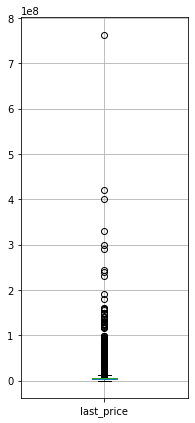

In [8]:
df.boxplot(column='last_price', figsize=(3,7))

Сделаем чуть покрупнее, чтобы увидеть границы распределения:

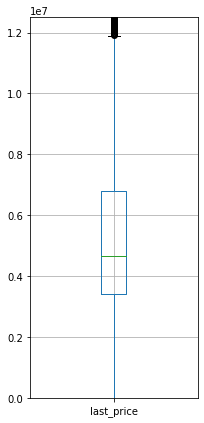

In [9]:
df.boxplot(column='last_price', figsize=(3,7)); 
plt.ylim(0, 12500000)
plt.show()

Чуть-чуть не дотягивает до 12 млн рублей. Проверим все это гистограммой:

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

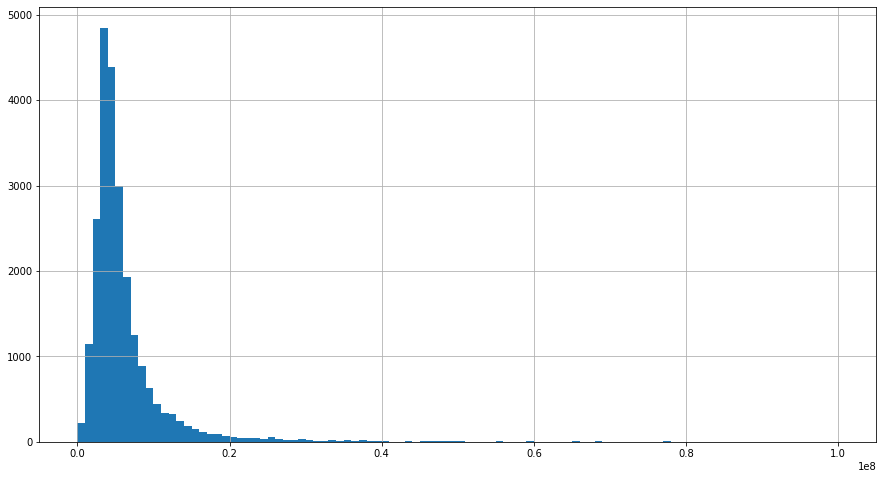

In [10]:
pd.Series(df['last_price'].hist(bins=100, range=(0, 100000000), figsize=(15, 8)))

В целом, все сходится. За переделом значений в 400 млн квартир уже практически нет.

Если с верхним пределом все более-менее понятно, то по нижнему есть вопросы. Сколько стоит самая дешевая недвижимость?

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

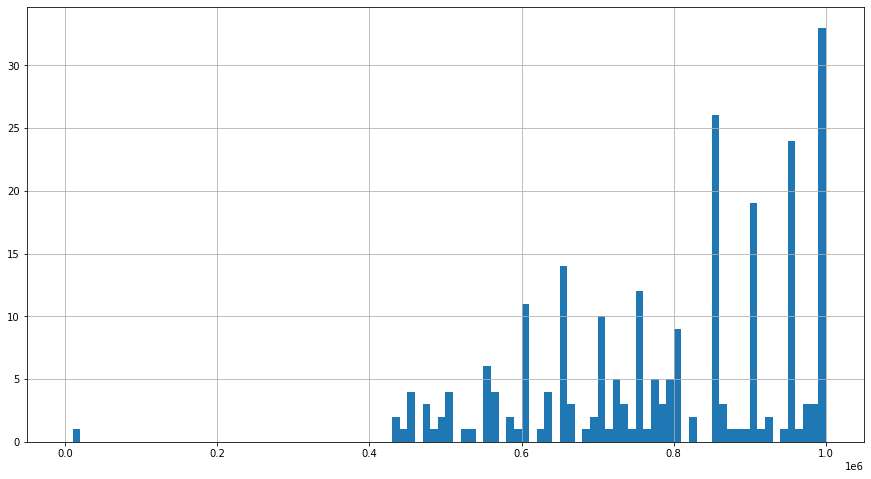

In [11]:
pd.Series(df['last_price'].hist(bins=100, range=(0, 1000000), figsize=(15, 8)))

Явно дешевле 400 тысяч рублей купить ничего нельзя, значения ближе к нулю это скорее всего опечатка, мы от них избавимся. 

Несмотря на то, что границы распределения проходят по планке примерно в 12 млн, я считаю, что мы не можем отказываться от сегмента сверхдорогой недвижимости, потому что она присутствует на рынке в значительном количестве:

In [12]:
print(f'Количество предложений в диапазоне 12-200 млн рублей: {len(df.query("12000000<last_price<200000000"))}')
print(f'Количество предложений в диапазоне свыше 200 млн рублей: {len(df.query("last_price>200000000"))}')

Количество предложений в диапазоне 12-200 млн рублей: 1932
Количество предложений в диапазоне свыше 200 млн рублей: 9


А вот значениями свыше 200 млн вполне можно пожертвовать, их всего 9 и особой погоды они нам не сделают, убираем.

Избавляемся от крайних значений:

In [13]:
df = df.query('400000<last_price<200000000')

Приводим к целочисленным значениям колонку `'total_area'`

In [14]:
to_int('total_area')

И смотрим, что у нас получилось.

In [15]:
df['total_area'].describe()

count    23689.000000
mean        59.977036
std         34.682909
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        631.000000
Name: total_area, dtype: float64

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

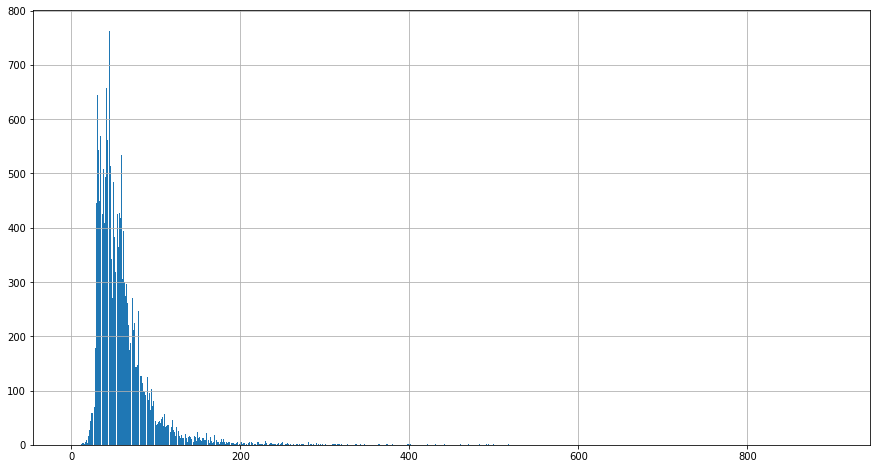

In [16]:
pd.Series(df['total_area'].hist(bins=1000, range=(0, 900), figsize=(15, 8)))

Смотрим на выбросы, потому что крайние значения в 631 м2 и 12 м2 настораживают:

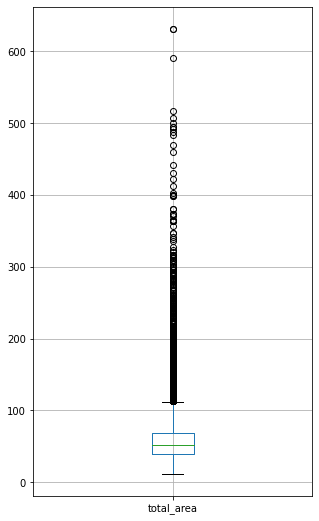

In [17]:
df.boxplot(column='total_area', figsize=(5,9)); 
plt.show()

Чуть крупнее:

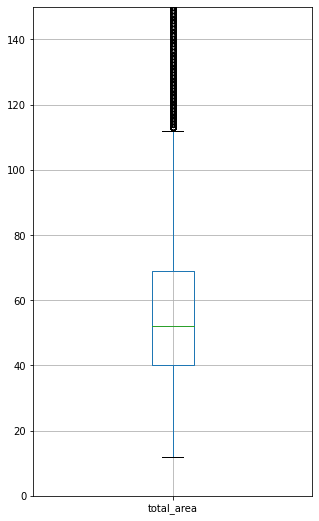

In [18]:
df.boxplot(column='total_area', figsize=(5,9)); 
plt.ylim(0, 150)
plt.show()

Верхние границы нормального распределения проходят по границе 110 м2. Но не стоит забывать, что это Санкт-Петербург. В силу исторического контекста, в домах старой постройки вполне могут продаваться большие многокомнатные квартиры, принадлежавшие богатым людям, поэтому я считаю, что эти значения стоит оставить.Вероятно, не все, самые крайние стоит отсечь, чтобы они не вносили сильных искажений, скажем, от 400 м2, благо, на гистограмме видно, что количество предложений там незначительное:

In [19]:
df.query('total_area>400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
660,3,49950000,483,2017-10-04T00:00:00,7,3.2,6.0,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
3117,19,140000000,631,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3676,12,28789000,441,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000,517,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000,590,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
6221,8,34000000,470,2018-01-14T00:00:00,4,NaN,3.0,248.7,3,NaN,...,40.0,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.00000000000003
6621,20,99000000,488,2017-04-09T00:00:00,5,2.95,20.0,216.0,17,NaN,...,50.0,NaN,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.00000000000006
8018,20,84000000,507,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
9826,1,43185328,494,2017-05-12T00:00:00,1,2.85,12.0,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0
12401,20,91500000,495,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0


Всего 18 предложений.

Теперь посмотрим нижние границы. Так как речь у нас идет все же о продаже квартир, а не комнат, то имеет смысл провести нижнюю планку по границе 20 м2, это вполне разумная площадь для квартиры-студии. Посмотрим, сколько у нас предложений меньше этой площади:

In [20]:
df.query('total_area<20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
716,5,1500000,17,2017-06-07T00:00:00,0,2.7,9.0,12.0,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
4542,12,3300000,18,2018-11-07T00:00:00,1,3.5,5.0,9.0,2,NaN,...,NaN,NaN,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
5855,3,945750,19,2017-09-18T00:00:00,0,2.76,3.0,12.7,2,False,...,NaN,0.0,поселок городского типа Дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0000000000000004
6084,6,770000,18,2017-10-16T00:00:00,1,NaN,5.0,13.0,4,NaN,...,3.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.00000000000001
8454,7,2250000,19,2019-03-12T00:00:00,0,3.0,6.0,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.00000000000001
8729,9,2200000,18,2018-08-20T00:00:00,1,2.52,3.0,14.0,3,NaN,...,2.4,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
8755,1,1350000,18,2017-11-22T00:00:00,0,2.75,19.0,15.8,1,NaN,...,NaN,NaN,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
8886,10,2450000,15,2018-08-22T00:00:00,0,NaN,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9157,0,3400000,17,2018-03-18T00:00:00,1,NaN,5.0,15.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0
9412,5,2100000,16,2017-12-10T00:00:00,0,NaN,6.0,13.0,1,NaN,...,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0000000000000004


Таким количеством можно пренебречь, применим фильтрацию к таблице:

In [21]:
df = df[df['total_area']>=20]

In [22]:
df=df[df['total_area']<400]

Переведем в корректный формат столбец `'first_day_exposition'` с датой размещения объявления:

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M')

Переходим к количеству комнат в квартирах.

In [24]:
df['rooms'].describe()

count    23642.000000
mean         2.067169
std          1.064983
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

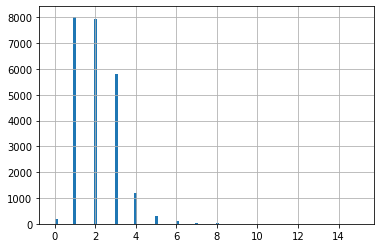

In [25]:
pd.Series(df['rooms']).hist(bins=100, range=(0,15))

Квартир без комнат не бывает, да и 19-комнатных квартир немного. Смотрим выбросы:

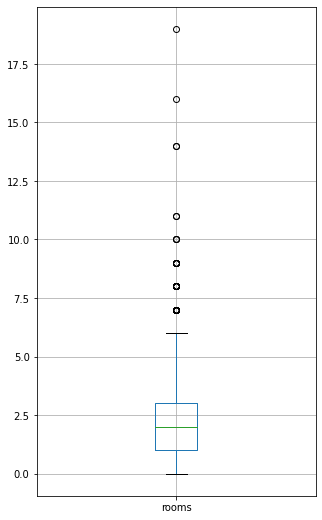

In [26]:
df.boxplot(column='rooms', figsize=(5,9)); 
plt.show()

Посмотрим, сколько у нас квартир с большим количеством комнат:

In [27]:
df.query('rooms>6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
581,20,65000000,365,2019-03-18,7,2.9,7.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
648,3,17500000,183,2018-07-01,11,3.4,7.0,138.8,7,NaN,...,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
681,20,24900000,249,2015-08-13,7,NaN,5.0,180.0,4,NaN,...,NaN,1.0,Санкт-Петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0
750,9,29500000,188,2017-03-04,7,2.7,2.0,119.3,1,NaN,...,10.2,0.0,Санкт-Петербург,20965.0,814.0,0.0,NaN,2.0,267.0,246.0
813,7,16500000,229,2016-02-25,8,NaN,6.0,160.0,5,NaN,...,25.0,NaN,Санкт-Петербург,23968.0,4536.0,1.0,243.0,0.0,NaN,806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22264,20,22000000,141,2019-01-24,7,NaN,5.0,84.0,2,NaN,...,25.0,NaN,Санкт-Петербург,20243.0,3334.0,2.0,447.0,1.0,468.0,90.00000000000001
22420,12,25000000,196,2016-11-04,7,3.5,6.0,145.0,5,NaN,...,17.0,1.0,Санкт-Петербург,25083.0,3658.0,1.0,552.0,0.0,NaN,NaN
22649,18,22900000,206,2016-04-04,7,NaN,6.0,142.0,2,NaN,...,16.2,0.0,Санкт-Петербург,25079.0,5544.0,0.0,NaN,1.0,251.0,75.0
23400,17,30000000,213,2017-09-28,7,3.4,5.0,151.4,5,NaN,...,30.8,NaN,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0


Не так много, по идее, их тоже можно убрать, но я их тоже все - таки оставлю, руководствуясь теми же соображениями, что какие-то из них вполне могут быть в старом жилом фонде.

Теперь посмотрим на квартиры-призраки без площади:

In [28]:
df.query('rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27,2017-03-30,0,NaN,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00000000000003
349,4,2320000,25,2017-09-27,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
440,8,2480000,27,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34,2017-03-28,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01,0,NaN,25.0,18.0,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000,27,2017-09-28,0,NaN,24.0,18.0,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000,26,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000,29,2017-11-11,0,NaN,9.0,18.0,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


А вот их придется удалить, если не получится уточнить данные у составителей таблицы.

Отфильтруем все положительные значения:

In [29]:
 df = df[df['rooms']>0]

Переходим к столбцу с высотой потолков `'ceiling_height'`.

Для начала приводим его к численному значению и смотрим на распределение.

In [30]:
df['ceiling_height'] = df['ceiling_height'].astype('float')

In [31]:
df['ceiling_height'].describe()

count    14390.000000
mean         2.768670
std          1.249051
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Стометровые потолки это очень большая редкость, и потолок в 1 метр тоже маловато даже для подвала. Смотрим на распределение дальше:

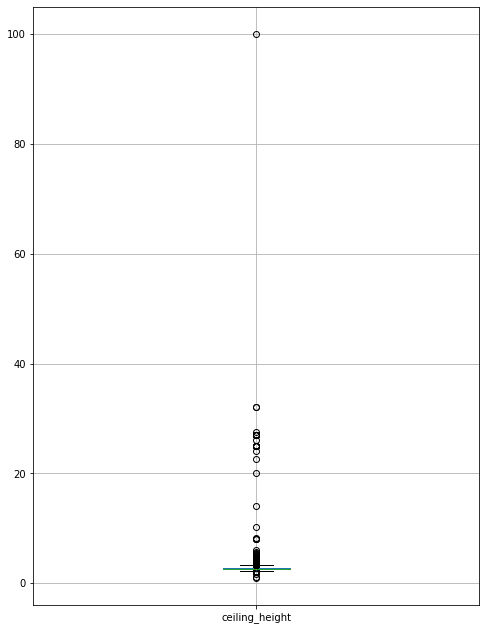

In [32]:
df.boxplot(column='ceiling_height', figsize=(8,11)); 
plt.show()

И еще чуть поближе:

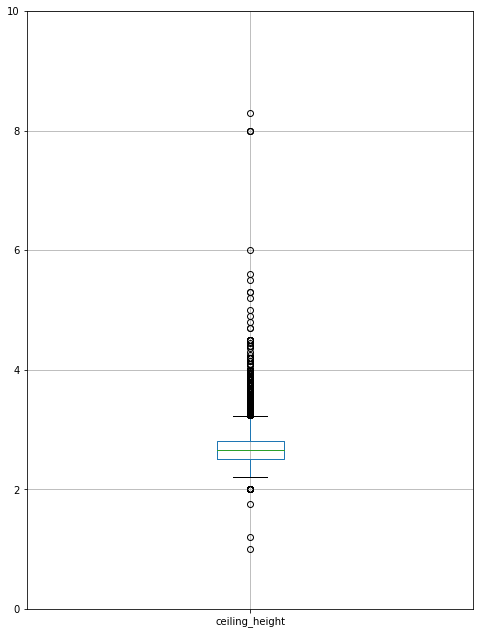

In [33]:
df.boxplot(column='ceiling_height', figsize=(8,11)); 
plt.ylim(0, 10)
plt.show()

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

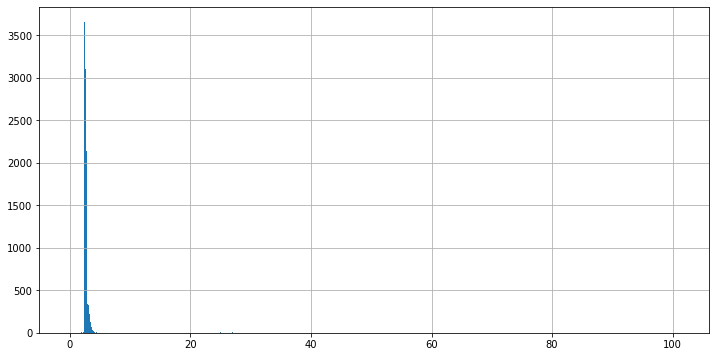

In [34]:
pd.Series(df['ceiling_height'].hist(bins=1000, range=(0, 101), figsize=(12,6)))

Нормальное распределение не выходит за 3,5 метра. Минимальная высота потолков в новостройках сейчас 2,5 метра. Вычтем из нее запас на подвесные потолки, пусть будет 2,2 м. Верхний предел поставим в 5 м, потому что, опять же, старый жилой фонд. 

In [35]:
display(df.query('ceiling_height>5 or ceiling_height<2.2'))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000,55,2018-07-12,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000,280,2015-06-11,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
552,11,2999000,33,2017-03-30,1,2.00,15.0,17.5,6,NaN,...,6.5,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1026,20,155000000,310,2018-10-12,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000,399,2015-01-21,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0000000000001
2572,4,2400000,62,2018-12-27,3,2.00,5.0,40.0,4,NaN,...,6.0,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,14,2900000,75,2018-11-12,3,32.00,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000,30,2018-03-16,1,8.00,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4212,1,2120000,35,2017-12-18,1,2.00,18.0,16.6,9,NaN,...,8.8,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4643,0,4300000,45,2018-02-01,2,25.00,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.00000000000003


Мы видим, что в заданные нами параметры не вписалось не так уж много квартир, и ими также можно пожертвовать.

In [36]:
#df=df.query('2.2<ceiling_height<5')
index_list = df.query('ceiling_height>5 or ceiling_height<2.2').index
df.drop(index_list, inplace=True, axis=0)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23405 non-null  int64         
 1   last_price            23405 non-null  int64         
 2   total_area            23405 non-null  int64         
 3   first_day_exposition  23405 non-null  datetime64[ns]
 4   rooms                 23405 non-null  int64         
 5   ceiling_height        14342 non-null  float64       
 6   floors_total          23322 non-null  object        
 7   living_area           21535 non-null  object        
 8   floor                 23405 non-null  int64         
 9   is_apartment          2750 non-null   object        
 10  studio                23405 non-null  bool          
 11  open_plan             23405 non-null  bool          
 12  kitchen_area          21353 non-null  object        
 13  balcony         

Заполним пропуски в столбце `'ceiling_height'` средним значением:

In [38]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())


И переведем для удобства высоту потолков в сантиметры:

In [39]:
df['ceiling_height'] = df['ceiling_height'] * 100
df['ceiling_height'] = df['ceiling_height'].astype('int')
df['ceiling_height'].head(10)  # проверка значений

0    270
1    265
2    265
3    265
4    303
5    265
6    265
7    265
8    265
9    250
Name: ceiling_height, dtype: int64

Теперь посчитаем количество пропусков в столбце с этажностью зданий `'floors_total'`.

In [40]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000,65,2018-10-02,2,265,NaN,30.8,4,NaN,...,12.0,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28,2016-11-23,1,265,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70,2015-08-01,2,265,NaN,38.4,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0000000000001
671,4,6051191,93,2017-04-06,3,265,NaN,47.1,8,NaN,...,16.8,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39,2017-04-22,1,265,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63,2017-05-24,2,280,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64,2017-04-02,2,265,NaN,31.7,20,NaN,...,14.4,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110,2016-11-20,3,265,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123,2017-04-25,3,265,NaN,50.4,18,NaN,...,23.6,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


83 пропуска, убираем.

In [41]:
df.dropna(subset=['floors_total'],inplace=True)

Приводим к целочисленному значению:

In [42]:
to_int('floors_total')

In [43]:
df['floors_total'].describe()

count    23322.000000
mean        10.630735
std          6.567902
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Смотрим на выбросы. 60 этажей это очень много:

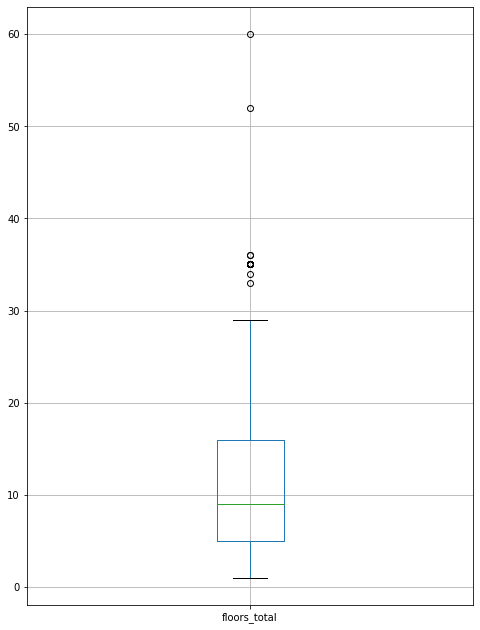

In [44]:
df.boxplot(column='floors_total', figsize=(8,11)); 
plt.show()

Здесь лучше оставаться в рамках диаграммы, потому что у нас не так много жилых небоскребов, да и по графику видно, что аномалии начинаются с 27 этажей, таких квартир немного и их также можно удалить:

In [45]:
print(f'Количество квартир, расположеннных выше 27 этажа: {len(df.query("floors_total>27"))} квартиры')

Количество квартир, расположеннных выше 27 этажа: 50 квартиры


In [46]:
df = df.query('floors_total<27')

На всякий случай делаем перерыв и смотрим, как выглядит таблица. Пока вроде все под контролем.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23110 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23110 non-null  int64         
 1   last_price            23110 non-null  int64         
 2   total_area            23110 non-null  int64         
 3   first_day_exposition  23110 non-null  datetime64[ns]
 4   rooms                 23110 non-null  int64         
 5   ceiling_height        23110 non-null  int64         
 6   floors_total          23110 non-null  int64         
 7   living_area           21281 non-null  object        
 8   floor                 23110 non-null  int64         
 9   is_apartment          2721 non-null   object        
 10  studio                23110 non-null  bool          
 11  open_plan             23110 non-null  bool          
 12  kitchen_area          21113 non-null  object        
 13  balcony         

Посмотрим на пропуски в жилой площади:

In [48]:
df['living_area'].isna().sum()


1829

Достаточно много. Применим функцию для пересчета и заполнения средними значениями:

In [49]:
to_mean_to_int('living_area')



In [50]:
df['living_area'].describe()

count    23110.000000
mean        34.203462
std         19.907910
min          2.000000
25%         19.000000
50%         31.000000
75%         41.000000
max        264.000000
Name: living_area, dtype: float64

Посмотрим на распределение, жилой площади в 2 м2 хватит максимум кошке.

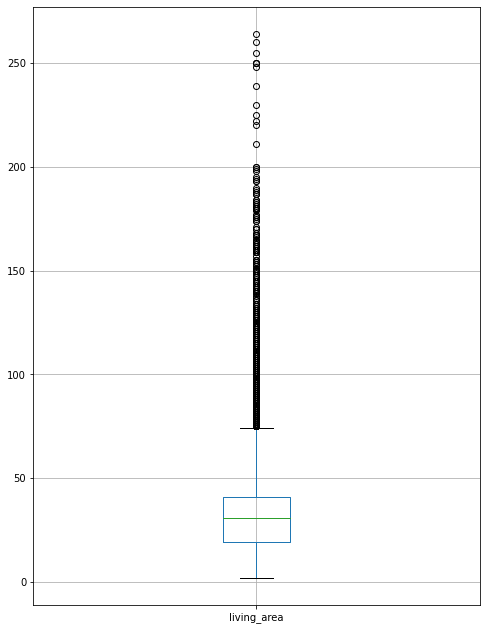

In [51]:
df.boxplot(column='living_area', figsize=(8,11)); 
plt.show()

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

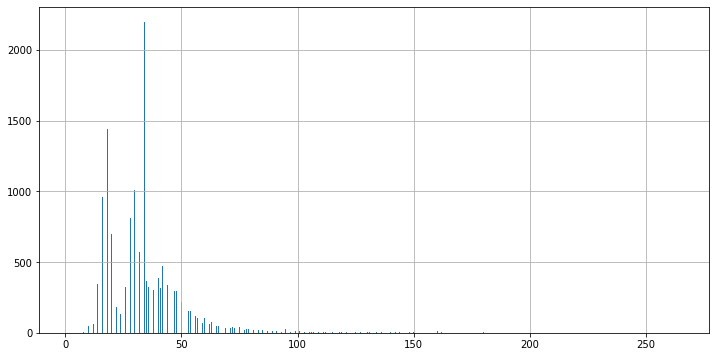

In [52]:
pd.Series(df['living_area'].hist(bins=1000, figsize=(12,6)))

Верхний предел распределения составляет около `70 м2`. Однако мы оставляли квартиры с большой площадью, да и в сегменте дорогого или старого жилого фонда большие квартиры это не редкость. Максимальная жилая площадь в `234 м2` выглядит вполне реальной.

Поэтому мы ограничим только нижнюю планку. Минимальная общая площадь у нас была `20 м2`, жилая от этого должна составлять примерно половину.

In [53]:
print(f'Количество квартир с жилой площадью менее 10 м2: {len(df.query("living_area<10"))}.')

Количество квартир с жилой площадью менее 10 м2: 21.


Применяем фильтрацию к таблице:

In [54]:
df = df[df['living_area']>10]

Разбираемся со столбцом `'is_apartment'`.

In [55]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Апартаменты это нежилое помещение, в котором можно жить, со своими плюсами и минусами. Судя по большому количеству пропусков, многие просто не знают, что это такое и пропускают вопрос при подаче объявления, так что заполним пропуски значениями `False`. Обычно владельцы апартаментов знают, что они купили.

In [56]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Переходим к площади кухни. Это достаточно важный параметр. Переведем в целочисленные значения и заполним пропуски средним значением:

In [57]:
to_mean_to_int('kitchen_area')

Что касается количества балконов, то если хозяева его не указали, скорее всего, его просто нет. Заполним пропуски нулями.

In [58]:
df['balcony'] = df['balcony'].fillna(0)
to_int('balcony')

Посчитаем количество пропусков в графе с названием населенного пункта `'locality_name'`:

In [59]:
print(f'Количество пропусков в графе с названием населенного пункта: {df["locality_name"].isna().sum()}.') 

Количество пропусков в графе с названием населенного пункта: 48.


И удалим эти строки, благо их не так много:

In [60]:
df.dropna(subset = ['locality_name'], inplace = True)

Приведем к целочисленному значению столбец с днями размещения объявления `'days_exposition'`

In [61]:
to_mean_to_int('days_exposition')

И проведем базовую коррекцию столбца `'locality_name'`: переведем все в нижний регистр и заменим 'ё' на 'е':

In [62]:
df['locality_name'] = df['locality_name'].str.lower()

In [63]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

Получилось!

In [64]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

In [65]:
df = df.drop_duplicates().reset_index(drop=True)
print("Количество пропусков: {}".format(df.duplicated().sum()))

Количество пропусков: 0


Заполним средними значениями расстояние до аэропорта:

In [66]:
to_mean_to_int('airports_nearest')

И удалим нулевые значения:

In [67]:
df = df.query('airports_nearest!=0')

Также заполним пропуски среднего расстояния до центра города:

In [68]:
to_mean_to_int('city_centers_nearest')

Проверка таблицы:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22992 entries, 0 to 22992
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22992 non-null  int64         
 1   last_price            22992 non-null  int64         
 2   total_area            22992 non-null  int64         
 3   first_day_exposition  22992 non-null  datetime64[ns]
 4   rooms                 22992 non-null  int64         
 5   ceiling_height        22992 non-null  int64         
 6   floors_total          22992 non-null  int64         
 7   living_area           22992 non-null  int64         
 8   floor                 22992 non-null  int64         
 9   is_apartment          22992 non-null  bool          
 10  studio                22992 non-null  bool          
 11  open_plan             22992 non-null  bool          
 12  kitchen_area          22992 non-null  int64         
 13  balcony         

In [70]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,days_exposition
count,22992.000000,2.299200e+04,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000,22992.000000
mean,9.900618,6.381462e+06,60.021225,2.091554,269.562630,10.462683,34.271660,5.757176,10.227775,0.588640,28749.689805,14178.002392,181.554410
std,5.680563,7.508646e+06,32.234259,1.054149,21.568167,6.357870,19.896734,4.705818,5.494186,0.959929,11028.803816,7578.661595,205.207696
min,0.000000,4.300000e+05,20.000000,1.000000,220.000000,1.000000,11.000000,1.000000,1.000000,0.000000,6450.000000,181.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,260.000000,5.000000,19.000000,2.000000,7.000000,0.000000,21135.000000,10894.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,265.000000,9.000000,31.000000,4.000000,9.000000,0.000000,28748.000000,14178.000000,125.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,270.000000,15.000000,41.000000,8.000000,11.000000,1.000000,34358.000000,15208.000000,199.000000
max,50.000000,1.908700e+08,398.000000,19.000000,500.000000,26.000000,264.000000,26.000000,107.000000,5.000000,84869.000000,65968.000000,1580.000000


По итогу мы потеряли 3,3% данных, что является достаточно высоким показателем, но, в то же время, мы смогли избавиться от большого количества недостоверных и некорректных данных, которые могли повлиять на итоги исследования. Также мы поменяли тип данных в столбцах, с которыми будем работать далее.

## Расчёты и добавление результатов в таблицу

Согласно заданию добавим новый столбец с указанием цены за квадратный метр и округлим значение. Затем проверим.

In [71]:
df['meter_price'] = (df['last_price']/df['total_area']).astype('int')

In [72]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price
0,20,13000000,108,2019-03-07,3,270,16,51,8,False,...,0,санкт-петербург,18863,16028,1.0,482.0,2.0,755.0,181,120370
1,7,3350000,40,2018-12-04,1,265,11,18,1,False,...,2,поселок шушары,12817,18603,0.0,NaN,0.0,NaN,81,83750
2,10,5196000,56,2015-08-20,2,265,5,34,4,False,...,0,санкт-петербург,21741,13933,1.0,90.0,2.0,574.0,558,92785
3,0,64900000,159,2015-07-24,3,265,14,34,9,False,...,0,санкт-петербург,28098,6800,2.0,84.0,3.0,234.0,424,408176
4,2,10000000,100,2018-06-19,2,303,14,32,13,False,...,0,санкт-петербург,31856,8098,2.0,112.0,1.0,48.0,121,100000


Теперь добавим столбцы с указанием дня недели, месяца и года размещения объявления:

In [73]:
df['day_exposed'] = df['first_day_exposition'].dt.day_name()

In [74]:
df['month_exposed'] = df['first_day_exposition'].dt.month_name()

In [75]:
df['year_exposed'] = df['first_day_exposition'].dt.year

In [76]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,meter_price,day_exposed,month_exposed,year_exposed
0,20,13000000,108,2019-03-07,3,270,16,51,8,False,...,16028,1.0,482.0,2.0,755.0,181,120370,Thursday,March,2019
1,7,3350000,40,2018-12-04,1,265,11,18,1,False,...,18603,0.0,NaN,0.0,NaN,81,83750,Tuesday,December,2018
2,10,5196000,56,2015-08-20,2,265,5,34,4,False,...,13933,1.0,90.0,2.0,574.0,558,92785,Thursday,August,2015
3,0,64900000,159,2015-07-24,3,265,14,34,9,False,...,6800,2.0,84.0,3.0,234.0,424,408176,Friday,July,2015
4,2,10000000,100,2018-06-19,2,303,14,32,13,False,...,8098,2.0,112.0,1.0,48.0,121,100000,Tuesday,June,2018


Все получилось. Теперь рассчитаем соотношение жилой и общей площади квартир:

In [77]:
df['living_area_ratio'] = ((df['living_area']*100)/df['total_area']).astype('int')

И соотношение площади кухни и квартиры:

In [78]:
df['kitchen_ratio'] = ((df['kitchen_area']*100)/df['total_area']).astype('int')

Также нам нужно категоризировать распределение квартир по этажам, `первый`, `последний` или `другой`. Для этого напишем функцию:

In [79]:
def floor_kind(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_kind'] = df.apply(floor_kind, axis=1)

Все присутствует, таблица поменялась.

In [80]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,day_exposed,month_exposed,year_exposed,living_area_ratio,kitchen_ratio,floor_kind
0,20,13000000,108,2019-03-07,3,270,16,51,8,False,...,2.0,755.0,181,120370,Thursday,March,2019,47,23,другой
1,7,3350000,40,2018-12-04,1,265,11,18,1,False,...,0.0,NaN,81,83750,Tuesday,December,2018,45,27,первый
2,10,5196000,56,2015-08-20,2,265,5,34,4,False,...,2.0,574.0,558,92785,Thursday,August,2015,60,14,другой
3,0,64900000,159,2015-07-24,3,265,14,34,9,False,...,3.0,234.0,424,408176,Friday,July,2015,21,6,другой
4,2,10000000,100,2018-06-19,2,303,14,32,13,False,...,1.0,48.0,121,100000,Tuesday,June,2018,32,41,другой
5,10,2890000,30,2018-09-10,1,265,12,14,5,False,...,NaN,NaN,55,96333,Monday,September,2018,46,30,другой
6,5,7915000,71,2019-04-18,2,265,24,34,22,False,...,0.0,NaN,181,111478,Thursday,April,2019,47,25,другой
7,18,5400000,61,2017-02-26,3,250,9,43,7,False,...,0.0,NaN,289,88524,Sunday,February,2017,70,9,другой
8,5,5050000,39,2017-11-16,1,267,12,20,3,False,...,2.0,553.0,137,129487,Thursday,November,2017,51,20,другой
9,9,3300000,44,2018-08-27,2,265,5,31,4,False,...,0.0,NaN,7,75000,Monday,August,2018,70,13,другой


## Исследовательский анализ данных

Теперь нам нужно провести исследовательскую работу.

Начнем со столбца со сроками продажи:

In [81]:
df['days_exposition'].describe()

count    22992.000000
mean       181.554410
std        205.207696
min          1.000000
25%         45.000000
50%        125.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пока особо ничего не понятно, но минимальное значение в один день впечатляет, видимо, квартира была очень хорошая.

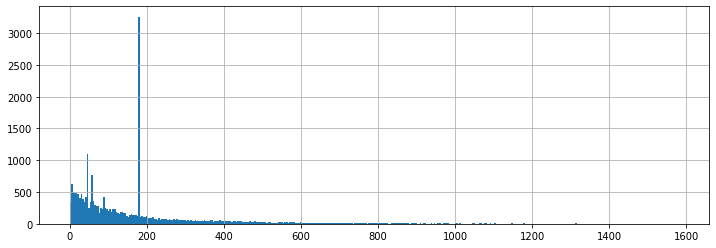

In [82]:
df['days_exposition'].hist(bins=400, figsize=(12, 4))
plt.show()

Может быть, долго продаются очень дорогие квартиры? Но нет, квартиры тоже разные. Смотрим дальше.

In [83]:
df.query('days_exposition>1000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,day_exposed,month_exposed,year_exposed,living_area_ratio,kitchen_ratio,floor_kind
17738,13,1150000,57,2015-01-21,2,265,5,31,5,False,...,NaN,NaN,1396,20175,Wednesday,January,2015,54,15,последний
11075,4,1199000,41,2016-03-11,2,250,4,26,4,False,...,NaN,NaN,1021,29243,Friday,March,2016,63,14,последний
11114,7,1200000,59,2014-12-11,3,250,5,44,2,False,...,NaN,NaN,1105,20338,Thursday,December,2014,74,8,другой
22841,10,1500000,43,2016-06-28,2,254,3,28,2,False,...,NaN,NaN,1007,34883,Tuesday,June,2016,65,16,другой
6273,14,1850000,73,2016-01-13,3,254,5,42,3,False,...,NaN,NaN,1100,25342,Wednesday,January,2016,57,10,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,16,43500000,245,2015-12-17,3,445,7,170,7,True,...,0.0,NaN,1067,177551,Thursday,December,2015,69,10,последний
11154,1,46424072,92,2014-12-09,2,265,6,54,6,True,...,3.0,569.0,1030,504609,Tuesday,December,2014,58,21,последний
4272,20,57000000,174,2015-11-09,3,320,10,95,6,False,...,3.0,199.0,1039,327586,Monday,November,2015,54,44,другой
16906,19,65138176,169,2014-12-09,4,300,8,95,4,False,...,1.0,549.0,1001,385432,Tuesday,December,2014,56,13,другой


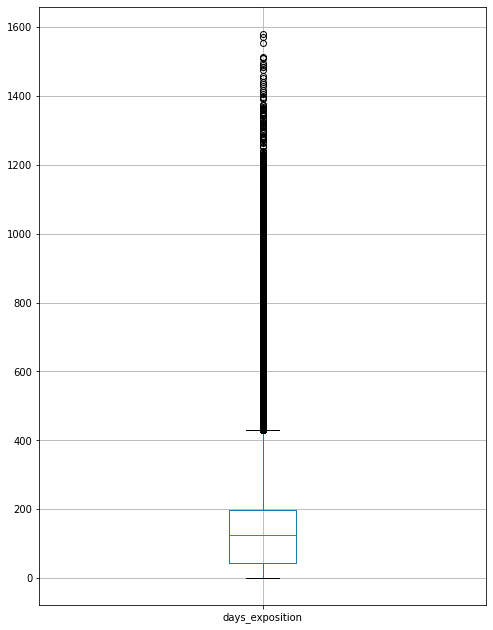

In [84]:
df.boxplot(column='days_exposition', figsize=(8,11)); 
plt.show()

Видно, что сроки продажи редко выбиваются за 400 дней.

Посмотрим, есть ли какая-то закономерность в сроках продажи. Весьма странным образом первые 6 позиций занимают сроки в 7, 30, 45, 60, 90 и 180 дней. Не похоже на простое совпадение. 

Проверив условия публикации объявлений о продаже недвижимости на сервисе Яндекс.Недвижимость, мы видим, что срок размещения платного объявления составляет 30 дней, и это объясняет кратные значения 60, 90, потому что люди продлевали свои объявления. 

Пик 181 день объясняется тем, что лимит по срокам бесплатного объявления составляет 180 дней, затем его надо удалить, если вы хотите разместить новое объявление. 

Высокую долю объявлений со сроком в 45 дней пока объяснить затруднительно, вероятно, это тоже какие-то лимиты Яндекса. Также это значение является нижним квартилем. 

Срок публикации в 7 дней может быть и простым совпадением, хотя таких значений достаточно много.

In [85]:
df['days_exposition'].value_counts().head(10)

181    3136
45      854
60      525
7       220
30      199
90      198
4       168
3       150
5       146
14      141
Name: days_exposition, dtype: int64

Посмотрим на средние и медианные значения:

In [86]:
print('Среднее время продажи квартиры: {} дней.'.format(int(df['days_exposition'].mean())))
print('Медианное время продажи квартиры: {} дней.'.format(int(df['days_exposition'].median())))

Среднее время продажи квартиры: 181 дней.
Медианное время продажи квартиры: 125 дней.


Половина квартир продается всего за 4 месяца. Весьма активный спрос.

Посмотрим, какова доля аномально долгих продаж:

In [87]:
df.query('days_exposition>420')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,day_exposed,month_exposed,year_exposed,living_area_ratio,kitchen_ratio,floor_kind
2,10,5196000,56,2015-08-20,2,265,5,34,4,False,...,2.0,574.0,558,92785,Thursday,August,2015,60,14,другой
3,0,64900000,159,2015-07-24,3,265,14,34,9,False,...,3.0,234.0,424,408176,Friday,July,2015,21,6,другой
15,6,4180000,36,2016-09-09,1,265,17,16,7,False,...,1.0,859.0,571,116111,Friday,September,2016,44,30,другой
20,11,2950000,32,2016-10-29,1,260,9,17,9,False,...,1.0,190.0,615,92187,Saturday,October,2016,53,18,последний
32,6,15500000,149,2017-06-26,5,265,5,104,4,False,...,1.0,779.0,644,104026,Monday,June,2017,69,11,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22958,5,9000000,110,2015-12-10,4,336,7,64,5,False,...,1.0,118.0,816,81818,Thursday,December,2015,58,13,другой
22966,5,3000000,30,2016-06-08,1,265,5,16,3,False,...,0.0,NaN,808,100000,Wednesday,June,2016,53,20,другой
22969,8,3550000,39,2016-10-03,1,265,16,19,13,False,...,0.0,NaN,721,91025,Monday,October,2016,48,20,другой
22985,11,9470000,72,2016-10-13,2,275,25,40,7,False,...,1.0,806.0,519,131527,Thursday,October,2016,55,13,другой


Не все так плохо, около 10%. Причин этому может быть множество.

Получается, что нормальные сроки продажи находятся в диапазоне *45-420* дней. Все, что меньше, это уже большая удача, все, что больше это уже перебор, и надо разбираться в причинах долгой продажи.

Теперь посмотрим на соотношение площади квартиры и цены:

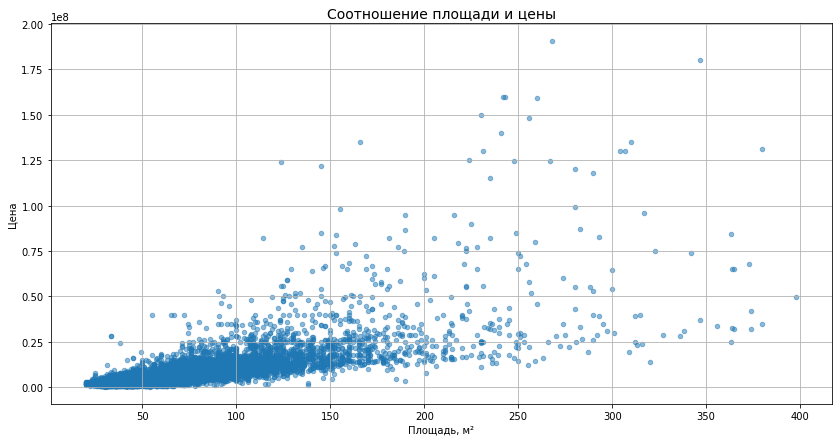

In [88]:
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5)
plt.title('Соотношение площади и цены', size=14)
plt.xlabel('Площадь, м²')
plt.ylabel('Цена')
plt.show()

In [89]:
print('Соотношение площади и цены: {} дней.'.format(df['total_area'].corr(df['last_price'])))

Соотношение площади и цены: 0.7243856822576655 дней.


Мы видим, что между этими двумя параметрами заметная связь, что, впрочем, достаточно предсказуемо. Чем больше квартира, тем она дороже, как правило. Конечно, с поправкой на другие факторы. 

В диапазоне до 12,5 млн и до 150 м2 зависимость особенно явная.


Теперь посмотрим, влияет ли на цену количество комнат в квартире?

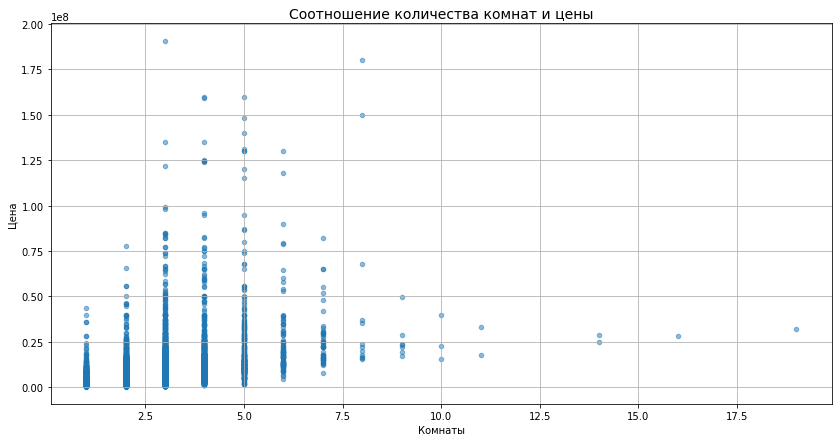

In [90]:
df.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5)
plt.title('Соотношение количества комнат и цены', size=14)
plt.xlabel('Комнаты')
plt.ylabel('Цена')
plt.show()

In [91]:
print('Соотношение количества комнат и цены: {}.'.format(df['rooms'].corr(df['last_price'])))

Соотношение количества комнат и цены: 0.43087284251903296.


И нет, почти не влияет. Самые ходовые варианты 2-5 комнат, каждый выбирает под свои конкретные нужды.

А есть ли связь между этажом и ценой квартиры?

<AxesSubplot:xlabel='floor_kind'>

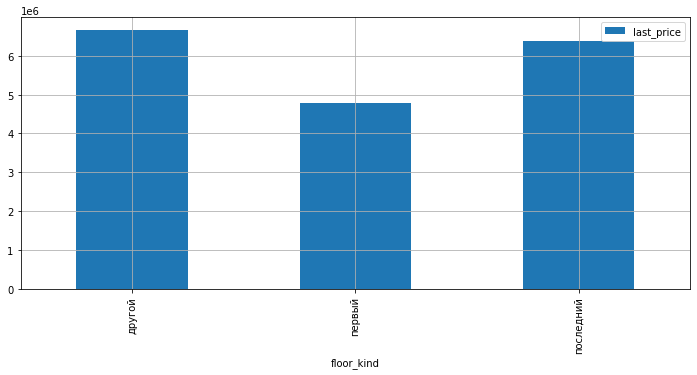

In [92]:
floors = df.pivot_table(index = 'floor_kind', values = 'last_price', aggfunc = 'mean')
floors.plot(kind = 'bar', grid = True, figsize =(12, 5))


А вот тут связь есть. Квартиры на первом этаже значительно дешевле! Разница составляет почти 25%. Квартиры на последнем этаже не так сильно, но все же уступают в цене, около 5%.


Теперь посмотрим на соотношение цены и расстояия до центра:

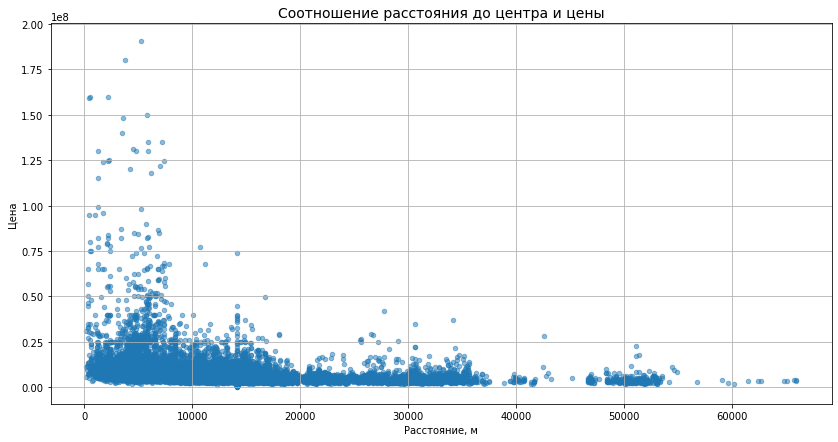

Соотношение расстояния до центра и цены: -0.2617425040350194.


In [93]:
df.plot(x='city_centers_nearest', y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5)
plt.title('Соотношение расстояния до центра и цены', size=14)
plt.xlabel('Расстояние, м')
plt.ylabel('Цена')
plt.show()
print('Соотношение расстояния до центра и цены: {}.'.format(df['city_centers_nearest'].corr(df['last_price'])))

В пределах 20-км радиуса цены квартир примерно на одном уровне с выбросами дорогого жилья внутри 10-км кольца. Далее мы видим, что на отметках 40 и 50 км явно присутствуют какие-то зоны с дорогим жильем, надо уточнять по карте, что это такое. Может быть, города-спутники?


Далее посмотрим, зависит ли цена от дня подачи объявления? Нет, почти не зависит. Немного выбивается четверг.

,last_price
day_exposed,
Friday,6.366015e+06
Monday,6.334383e+06
Saturday,6.157613e+06
Sunday,6.228234e+06
Thursday,6.688600e+06
Tuesday,6.324097e+06
Wednesday,6.343081e+06


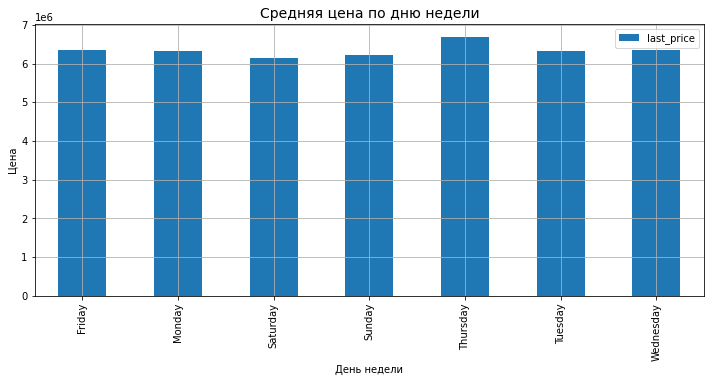

In [94]:
days = df.pivot_table(index = 'day_exposed', values = 'last_price', aggfunc = 'mean')
display(days)
days.plot(kind='bar', grid=True, figsize=(12,5))
plt.title('Средняя цена по дню недели', size=14)
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()


Проверим то же самое для месяца подачи объявления. Самые высокие цены в декабре и июле, самые низкие в октябре и марте. Есть возможность сэкономить при покупке.

Вероятно, пиковые значения в декабре и июле объясняются тем, что люди психологически настраиваются на долгое ожидание и закладывают цены с запасом на скидки и торг, потому что лето мертвый сезон, все в отпусках, а перед Новым годом если кто-то и будет заниматься покупкой недвижимости, то они, скорее всего, будут пытаться завершить сделку до праздников и за счет спешки можно немного повысить стоимость продажи.

Низкие цены в марте можно объяснить тем, что люди хотят закончить сделку перед сезоном отпусков, в октябре - чтобы без спешки закрыть сделку к Новому году.

,last_price
month_exposed,
April,6.342162e+06
August,6.435201e+06
December,6.594763e+06
February,6.318207e+06
January,6.547047e+06
July,6.598026e+06
June,6.269073e+06
March,6.197974e+06
May,6.362055e+06


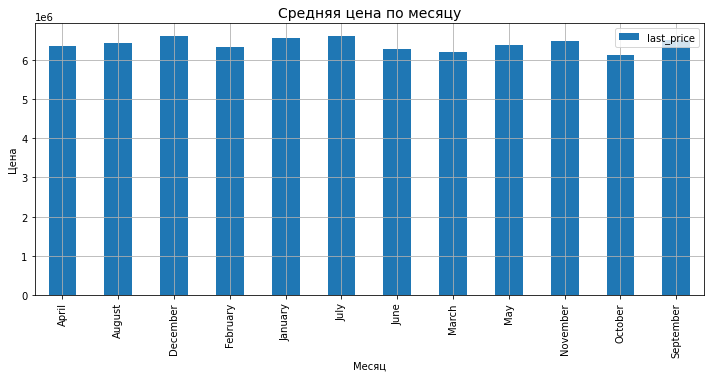

In [95]:
months = df.pivot_table(index = 'month_exposed', values = 'last_price', aggfunc = 'mean')
display(months)
months.plot(kind='bar', grid=True, figsize=(12,5))
plt.title('Средняя цена по месяцу', size=14)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

Проверим то же самое для года подачи объявления.

,last_price
year_exposed,
2014,1.210991e+07
2015,8.445261e+06
2016,6.664167e+06
2017,6.296678e+06
2018,5.932268e+06
2019,6.553216e+06


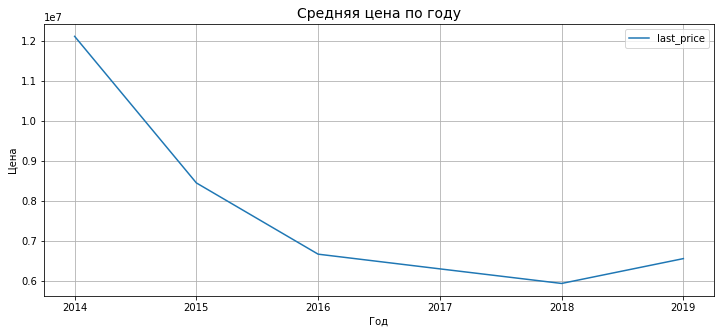

In [96]:
years = df.pivot_table(index = 'year_exposed', values = 'last_price', aggfunc = 'mean')
display(years)
years.plot(grid=True, figsize=(12,5))
plt.title('Средняя цена по году', size=14)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Как ни странно, цены падают. Я думаю, падение связано с выходом на рынок большого количества ЖК, предлагающих квартиры малой площади по низким ценам, что-то вроде студий, поэтому средняя цена падала.


Посмотрим, в каких же населенных пунктах у нас самая дорогая недвижимость:

In [97]:
top_max = df.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc = ('mean'))

In [98]:
top_max = top_max.sort_values(by='meter_price')

In [99]:
min_price = top_max['meter_price'][0].astype('int')

In [100]:
max_price = top_max['meter_price'][-1].astype('int')

In [101]:
print(f'Минимальная стоимость жилья в {top_max.index[0]}. - {min_price} рублей а квадратный метр.')
print(f'Максимальная стоимость жилья в городе {top_max.index[-1]}е - {max_price} рублей за квадратный метр.')


Минимальная стоимость жилья в деревня старополье. - 11238 рублей а квадратный метр.
Максимальная стоимость жилья в городе зеленогорске - 115527 рублей за квадратный метр.


In [102]:
top_10 = df.groupby('locality_name')['meter_price'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
top_10

,count,mean
locality_name,,
санкт-петербург,15351,114544.233666
поселок мурино,450,85541.708889
поселок шушары,433,78723.357968
всеволожск,391,69005.746803
пушкин,367,103559.029973
колпино,338,75735.150888
гатчина,306,69056.803922
деревня кудрово,281,92854.612100
поселок парголово,263,89445.254753


In [103]:
print(f'Средняя стоимость жилья в городе {top_10.index[0]}.')
print(f'Средняя стоимость жилья в городе {top_10.index[9]}.')


Средняя стоимость жилья в городе санкт-петербург.
Средняя стоимость жилья в городе выборг.


Выделим квартиры в Санкт-Петербурге в отдельную таблицу:

In [104]:
peter_flats = df.query('locality_name == "санкт-петербург"')

Сделаем столбец с расстоянием до центра города в километрах:

In [105]:
pd.options.mode.chained_assignment = None  # Тут оно выдавало какую-то ошибку о риске замещения данных в исходном датафрейме,
                                           # но я просто ее проигнорировал. Если что, подскажи, пожалуйста, что я сделал не так.
peter_flats['km_to_center'] = (peter_flats['city_centers_nearest']/1000).astype('int')
peter_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,meter_price,day_exposed,month_exposed,year_exposed,living_area_ratio,kitchen_ratio,floor_kind,km_to_center
0,20,13000000,108,2019-03-07,3,270,16,51,8,False,...,755.0,181,120370,Thursday,March,2019,47,23,другой,16
2,10,5196000,56,2015-08-20,2,265,5,34,4,False,...,574.0,558,92785,Thursday,August,2015,60,14,другой,13
3,0,64900000,159,2015-07-24,3,265,14,34,9,False,...,234.0,424,408176,Friday,July,2015,21,6,другой,6
4,2,10000000,100,2018-06-19,2,303,14,32,13,False,...,48.0,121,100000,Tuesday,June,2018,32,41,другой,8
6,5,7915000,71,2019-04-18,2,265,24,34,22,False,...,NaN,181,111478,Thursday,April,2019,47,25,другой,11




И посмотрим, как меняется цена в зависимости от удаленности от центра:



In [106]:
price_km = peter_flats.pivot_table(index = 'km_to_center', values = 'last_price', aggfunc = 'mean')
display(price_km)

,last_price
km_to_center,
0,2.337725e+07
1,1.640840e+07
2,1.477893e+07
3,1.208322e+07
4,1.303404e+07
5,1.384660e+07
6,1.321258e+07
7,1.192647e+07
8,8.477724e+06


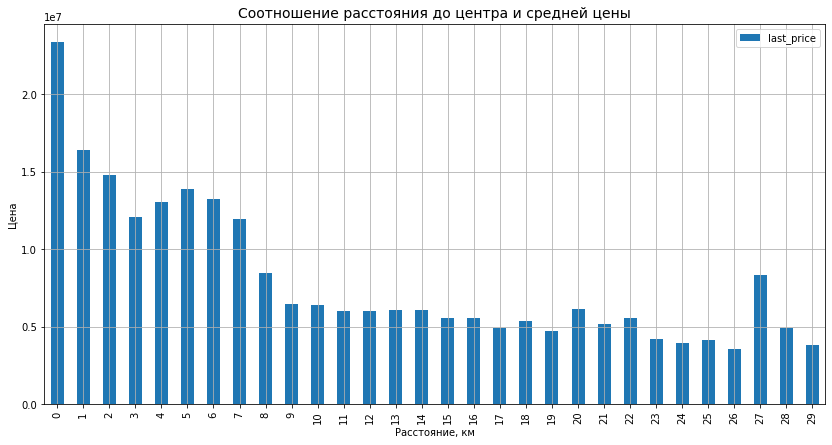

In [107]:
price_km.plot(kind='bar', grid=True, figsize=(14,7))
plt.title('Соотношение расстояния до центра и средней цены', size=14)
plt.xlabel('Расстояние, км')
plt.ylabel('Цена')
plt.show()


Мы видим, что на расстоянии 5 км есть небольшой повторный пик, затем начинается спад. Возьмем за центр расстояние до 7 км, потому что цены на 7 и 3 км почти одинаковые.

Сделаем матрицу, чтобы посмотреть на комплексную взаимосвязь:

,total_area,last_price,rooms,ceiling_height,city_centers_nearest
total_area,1.000000,0.682720,0.772887,0.267676,-0.141459
last_price,0.682720,1.000000,0.366623,0.169903,-0.071905
rooms,0.772887,0.366623,1.000000,0.238036,-0.187039
ceiling_height,0.267676,0.169903,0.238036,1.000000,-0.260165
city_centers_nearest,-0.141459,-0.071905,-0.187039,-0.260165,1.000000


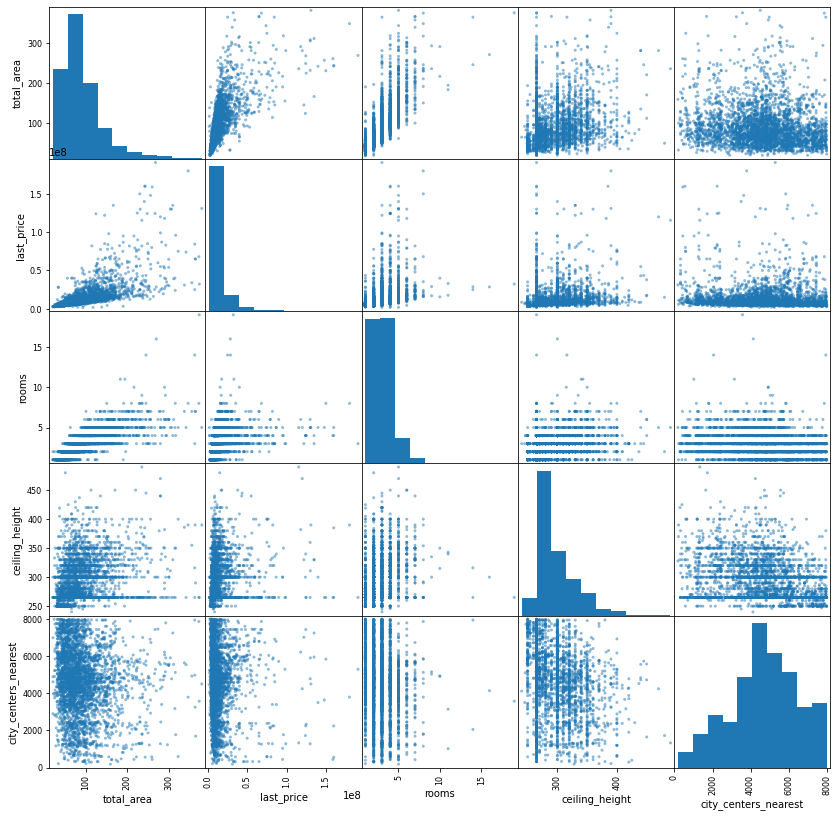

In [108]:
central_corr = peter_flats.query('km_to_center<=7')[['total_area', 'last_price', 'rooms', 'ceiling_height','city_centers_nearest' ]]
pd.plotting.scatter_matrix(central_corr, figsize=(14, 14)) 
central_corr.corr()

Ярко выраженная взаимосвязь только между площадью и ценой и площадью и наличием комнат - не любят у нас люди квартиры с большими комнатами.


Сделаем небольшую выборку по квартирам в центре для удобства, исключительно в технических целях:

In [109]:
central_flats = peter_flats.query('km_to_center<=7')[['total_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'first_day_exposition', 'city_centers_nearest']]

Посмотрим, есть ли разница в ценах на квартиры в центре и средней ценой по всей выборке в зависимости от числа комнат:

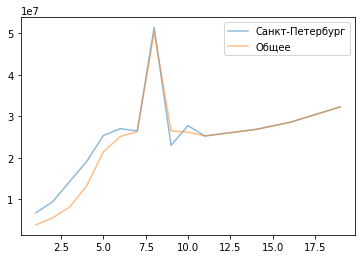

In [110]:
center_peter_rooms = central_flats.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
#center_peter_rooms.plot()
df_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
#df_rooms.plot()
plt.plot(center_peter_rooms, alpha = 0.5, label='Санкт-Петербург')
plt.plot(df_rooms, alpha = 0.5, label='Общее')
plt.legend(loc='upper right')

Естественно, цены в центре выше, но начиная с шестикомнатных квартир разницы практически нет.

Теперь посмотрим на корреляцию этажности и средней цены:

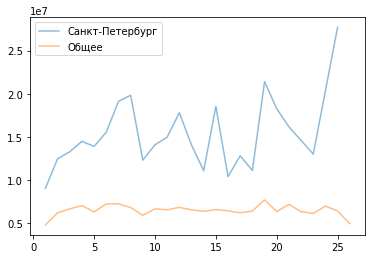

In [111]:
center_peter_floors = central_flats.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'mean')
#center_peter_floors
df_floors = df.pivot_table(index = 'floor', values = 'last_price', aggfunc = 'mean')
#df_floors.plot.bar()
plt.plot(center_peter_floors, alpha = 0.5, label='Санкт-Петербург')
plt.plot(df_floors, alpha = 0.5, label='Общее')
plt.legend(loc='upper left')

Здесь значения для центра уже значительно выше средних. Дороже всего квартиры в домах малой этажности (вероятно, старый фонд). Дальше график идет пиками, тут нужно разбираться более подробно. Вероятно, пики на значениях 12, 15, 20 и 25 вызваны увеличением количества высотных жилых комплексов с большими  и дорогими квартирами.


Что касается соотношения дат размещения объявлений и средней цены, мы видим, что пиковые значения приходятся на примерно одинаковые периоды. Конечно, в центре цена меняется чаще, но здесь и другие критерии и подход к выбору квартиры.

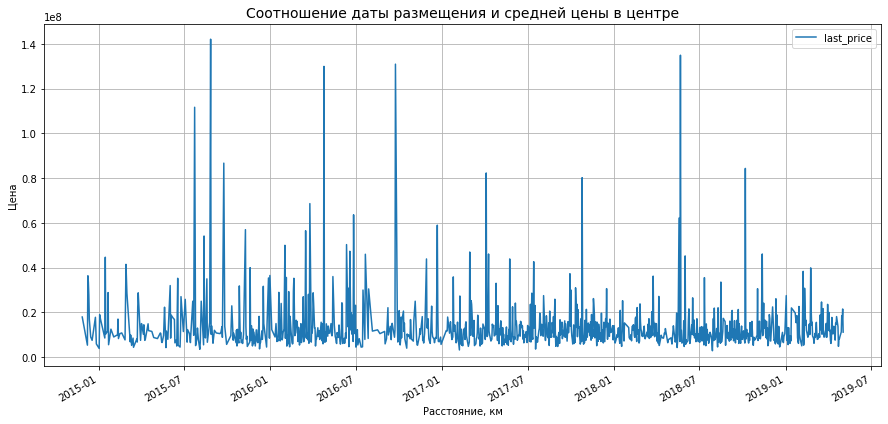

In [112]:
center_peter_date = central_flats.pivot_table(index = 'first_day_exposition', values = 'last_price', aggfunc = 'mean')
center_peter_date.plot(figsize=(15,7), grid = True)
plt.title('Соотношение даты размещения и средней цены в центре', size=14)
plt.xlabel('Расстояние, км')
plt.ylabel('Цена')
plt.show()


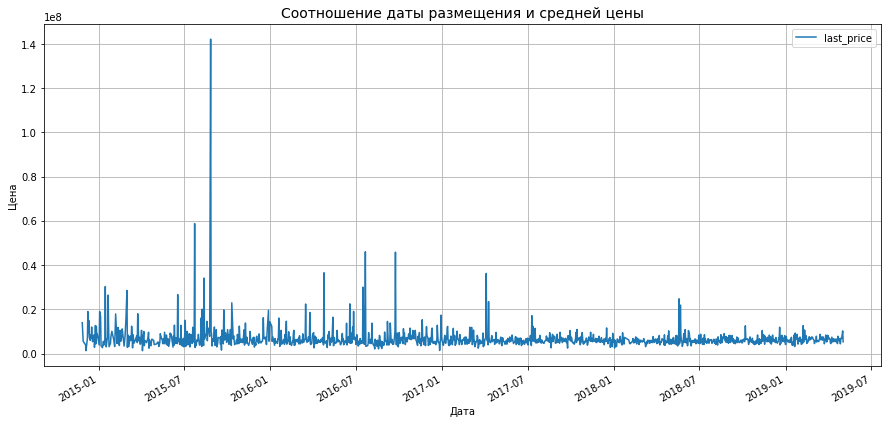

In [113]:
df_date = df.pivot_table(index = 'first_day_exposition', values = 'last_price', aggfunc = 'mean')
df_date.plot(figsize=(15,7), grid = True)
plt.title('Соотношение даты размещения и средней цены', size=14)
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()


## Общий вывод

* Нормальное время продажи квартиры в регионе находится в диапазоне 45- 420 дней. Все, что находится ниже или выше этих значений, можно считать аномально быстрой или долгой продажей.

* Редкие и выбивающиеся значения были убраны на этапе предобработки. Бросается в глаза много квартир большой площади, но с уверенностью утверждать, что это аномалии, нельзя, в силу исторических особенностей региона. Требует дальнейшего изучения.

* Сильнее всего на стоимость квартиры влияет ее площадь, этажность и удаление от центра. 

* Квартиры на первом этаже значительно дешевле других. Квартиры на последних этажах также ниже по цене, чем на других. 

* Есть небольшая взаимосвязь между месяцами публикации и средней ценой: в октябре и марте цены ниже всего, выше всего в декабре и июле.

* Также наблюдается снижение стоимости квартир, начиная с 2015 года. Впрочем, с 2019 цены опять пошли вверх.

* Возглавляет топ-10 объявлений Санкт-Петербург (более 15 тыс. объявлений), замыкает Выборг (234 объявления).

* Самая дорогая недвижимость в Зеленогорске (более 115 т.р. за квадратный метр), самая дешевая в деревне Старополье (около 11 т.р. за квадратный метр.

* Центральной зоной можно считать предложения, находящиеся в 7 км от центра, дальше цены идут вниз.

* Общие тенденции ценообразования и тенденции для квартир в центре примерно одинаковые, естественно, в центре цены выше.